## Time Series Decomposition

Time series decomposition involves breaking a time series down into its constituent components, which are typically trend, seasonality, and residual or noise. Decomposition can be performed in an additive or multiplicative manner.

### Additive Decomposition

In an additive model, the components of the time series are assumed to be added together. This is expressed mathematically as:

`Y(t) = T(t) + S(t) + R(t)`

Where:

- `Y(t)` is the value of the time series at time `t`
- `T(t)` is the trend component at time `t`
- `S(t)` is the seasonal component at time `t`
- `R(t)` is the residual or noise at time `t`

The additive model is most appropriate when the magnitude of the seasonality does not change with the level of the time series (the trend). In other words, the effect of the seasonality is roughly constant over time.

### Multiplicative Decomposition

In a multiplicative model, the components of the time series are multiplied together. This is expressed mathematically as:

`Y(t) = T(t) * S(t) * R(t)`

The same notation as above is used.

The multiplicative model is most appropriate when the magnitude of the seasonality increases or decreases with the level of the time series. In other words, the effect of the seasonality changes as the time series level changes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Set a seed for reproducibility
np.random.seed(42)

# Create a time index
time = pd.date_range('2020-01-01', periods=365, freq='D')

# Generate an increasing trend
trend = np.abs(np.arange(len(time))) + 1  # added 1 to ensure trend is strictly positive

# Generate a seasonal pattern
seasonality = 10 * np.abs(np.sin(np.linspace(0, 2*np.pi, len(time)))) + 10  # added 10 to ensure seasonality is strictly positive

# Generate some noise
noise = np.random.normal(0, 1, len(time))

# Create additive time series
additive = trend + seasonality + noise
additive_series = pd.Series(additive, index=time)

# Create multiplicative time series
multiplicative = trend * seasonality * (noise + np.abs(np.min(noise)) + 1)  # shift the entire series upwards to avoid zeros
multiplicative_series = pd.Series(multiplicative, index=time)

# Perform the decompositions
additive_decomposition = seasonal_decompose(additive_series, model='additive')
multiplicative_decomposition = seasonal_decompose(multiplicative_series, model='multiplicative')

### Choosing Between Additive and Multiplicative Decomposition

If the pattern of the seasonal component does not change with the time series level (the trend), then the additive model is more appropriate. If the pattern of the seasonal component does change with the time series level, then the multiplicative model is more appropriate.

It can sometimes be hard to tell whether the additive or multiplicative model is more appropriate just by looking at the time series plot. In this case, you can try both models and see which gives better results in terms of residual diagnostics and forecast accuracy.

It's important to note that, in real-world data, the choice between additive and multiplicative models might not always be clear cut, and other techniques, like Box-Cox transformations, can be used to stabilize the variance.

Also, both additive and multiplicative decompositions can be extended to handle other types of components, such as cyclical components or holiday effects.

### Additive Decompose

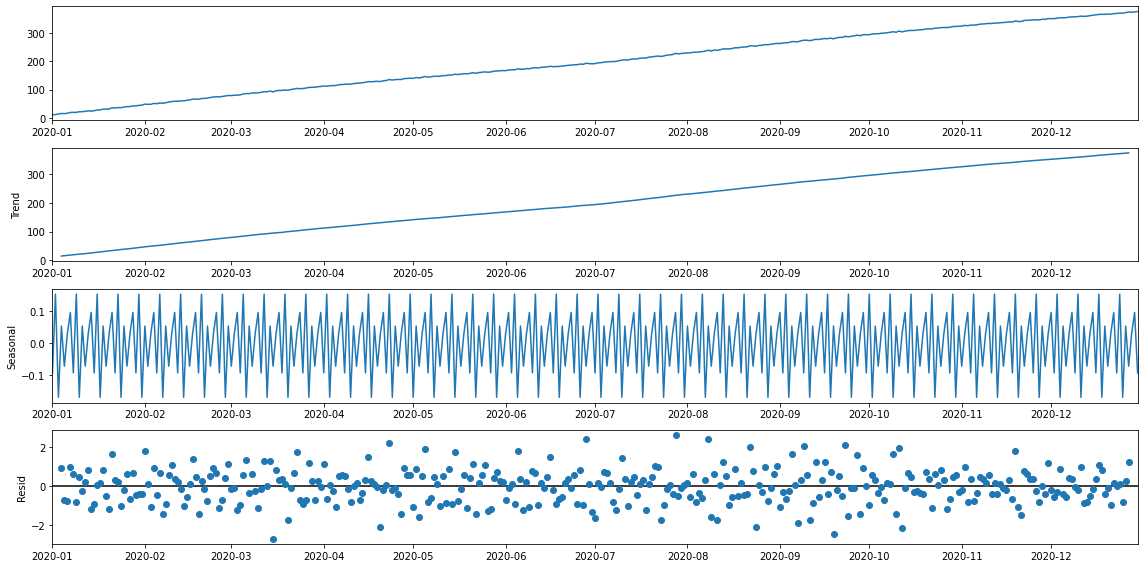

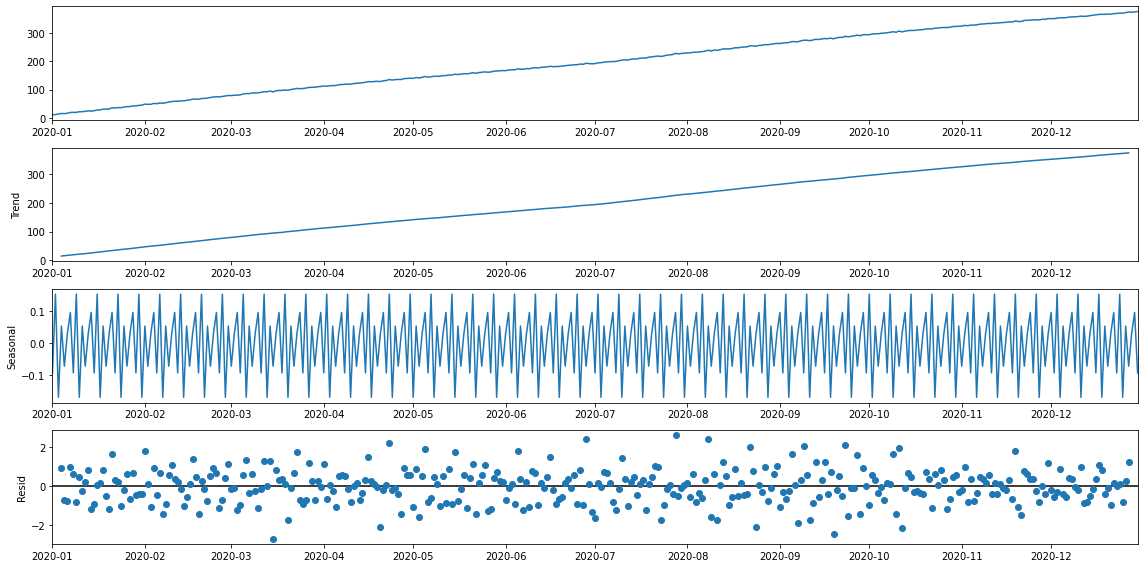

In [4]:
plt.rcParams['figure.figsize'] = (16,8)

additive_decomposition.plot()

### Multiplicative Decomposition

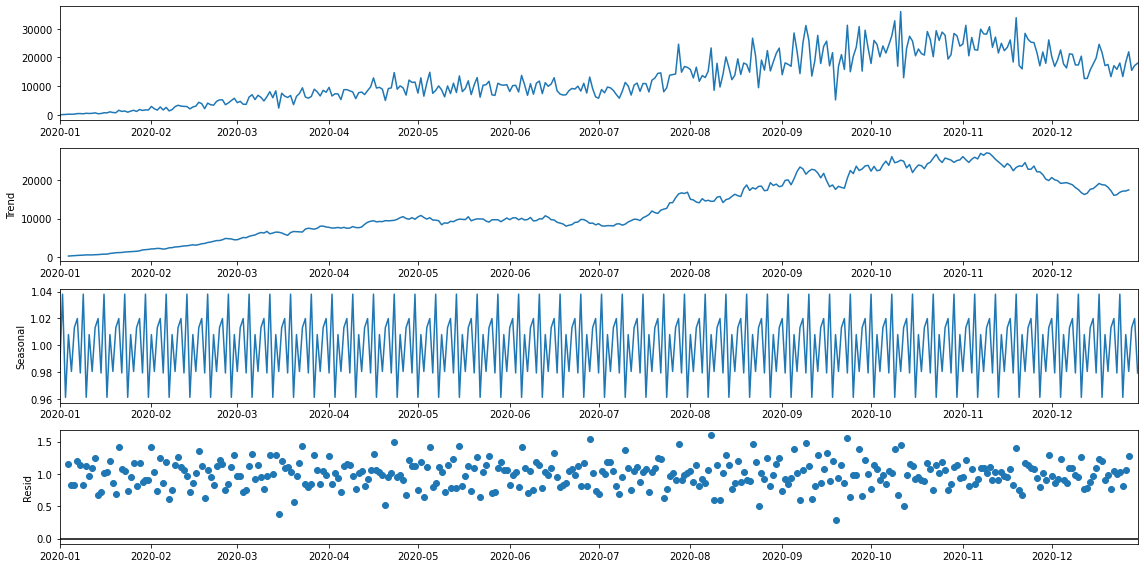

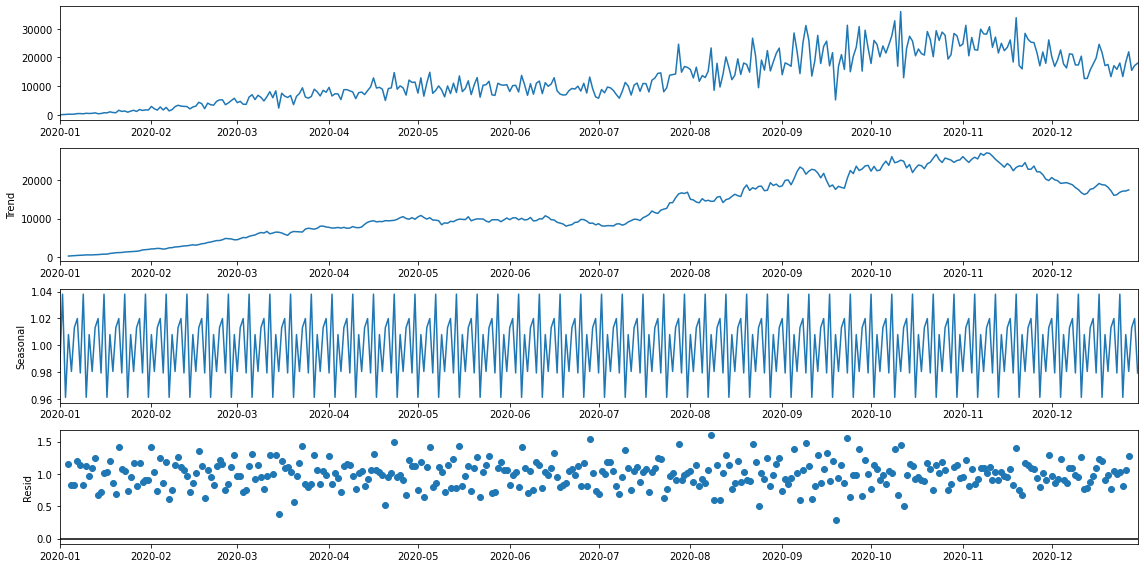

In [5]:
multiplicative_decomposition.plot()

## How to Determine Additive vs. Multiplicative Seasonality

Identifying whether a time series exhibits additive or multiplicative seasonality can sometimes be a challenging task, especially when the patterns in the data are not clear. Here are some pointers:

**Additive Seasonality**:

- If the seasonal variation is roughly constant over time, the seasonality is likely additive. 
- In an additive time series, the fluctuations do not change based on the time or trend. They maintain a consistent frequency and amplitude over time.
- In the additive decomposition, the trend is linear and seasonality is constant over time.

**Multiplicative Seasonality**:

- If the seasonal variation increases or decreases over time, the seasonality is likely multiplicative.
- In a multiplicative time series, the seasonal fluctuations increase or decrease over time in a proportional way. The changes are often percentage changes.
- In the multiplicative decomposition, the trend is typically exponential and the seasonality increases or decreases over time.

Visual inspection of a time series plot can often provide a good first indication of whether seasonality is additive or multiplicative. However, for a more formal determination, you may need to use statistical tests, model fitting, or other time series analysis techniques.

## How to Determine Additive vs. Multiplicative Trend

In a similar fashion, determining whether a time series exhibits an additive or multiplicative trend can be done by observing the nature of the trend over time:

**Additive Trend**:

- An additive trend is linear, with the same amount of change from one time point to the next.

**Multiplicative Trend**:

- A multiplicative trend is exponential (i.e., curved), with the amount of change increasing or decreasing over time.

Visual inspection is often a good first step to identifying the type of trend. However, more rigorous statistical tests or time series models may be necessary for a definitive identification.

In practice, choosing between additive and multiplicative models might not always be straightforward. In some cases, a time series might exhibit characteristics of both additive and multiplicative components, or the components might not be easily separable. In such cases, more complex models or transformations might be needed to accurately capture the characteristics of the time series.